In [11]:
import numpy as np
from spec_id import Gen_spec, Median_w_Error_cont
import matplotlib.pyplot as plt
from vtl.Photo import Photometry
from glob import glob
import pandas as pd
from scipy.interpolate import interp1d
import seaborn as sea
sea.set(style='white')
sea.set(style='ticks')
sea.set_style({"xtick.direction": "in","ytick.direction": "in"})
colmap = sea.cubehelix_palette(12, start=2, rot=.2, dark=0, light=1.1, as_cmap=True)

In [12]:
galDB = pd.read_pickle('../data/sgal_param_DB.pkl')
metal=np.arange(0.002,0.031,0.001)
age=np.arange(.5,6.1,.1)
tau=[0,8.0, 8.3, 8.48, 8.6, 8.7, 8.78, 8.85, 8.9, 8.95, 9.0, 9.04, 9.08, 9.11, 9.15, 9.18, 9.2, 9.23, 9.26, 9.28,
     9.3, 9.32, 9.34, 9.36, 9.38, 9.4, 9.41, 9.43, 9.45, 9.46, 9.48]

In [13]:
def Magnitude(flam):
    mag=-2.5*np.log10(flam)
    return mag

def Bootstrap_errors(f098,f850,M_f098,M_f850,its=1000):
    C_grid = np.zeros(its)
    IDs = np.arange(len(f850))
    for i in range(its):
        IDn = np.random.choice(IDs,len(IDs),replace=True)
        Dcolor=Magnitude((f850[IDn]*M_f098[IDn])/ (M_f850[IDn]*f098[IDn]))
        C_grid[i]=np.median(Dcolor)
    sea.distplot(C_grid)
    m_fit = np.median(C_grid)
    low_ers = np.sort(C_grid)[160]
    hi_ers = np.sort(C_grid)[840]
    
    return m_fit,low_ers,hi_ers

In [14]:
fDB = pd.read_pickle('../data/filter_db.pkl')

In [15]:
fDB

,M_F098,M_F098_err,M_F850,M_F850_err,N_F085,N_F850_err,S_F098,S_F098_err,S_F850,S_F850_C,S_F850_C_err,S_F850_err,gids
43,9.769333e-19,2.634086e-19,-9.900000e+01,-9.900000e+01,5.286964,0.047748,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n14713
49,2.098037e-18,1.445953e-19,1.747697e-18,2.422580e-19,13.888487,0.057810,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n16758
50,1.776399e-18,1.546954e-15,1.460517e-18,4.796781e-16,11.737332,0.045581,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n17070
58,3.732585e-19,2.511762e-19,3.264858e-19,3.000168e-19,2.900199,0.043631,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n19442
61,2.669737e-18,1.229185e-19,2.007763e-18,1.914146e-19,14.816056,0.065226,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n21156
62,6.894339e-19,2.779345e-19,-9.900000e+01,-9.900000e+01,3.911611,0.050748,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n21427
69,7.516320e-19,1.728003e-19,-9.900000e+01,-9.900000e+01,4.026039,0.051848,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n23435
86,1.314887e-18,1.625707e-19,1.119979e-18,2.683114e-19,8.267406,0.063951,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n32566
96,2.779187e-18,1.763211e-19,2.231156e-18,3.143401e-19,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n34694
107,1.752857e-18,1.496945e-19,1.319187e-18,2.338029e-19,9.538568,0.051461,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,-99.000000,n37686


In [16]:
flam_098 = []
flam_098_err = []
flam_850 = []
flam_850_err = []

effwv_098 = 9840.877482
effwv_850 = 9001.008862

for i in fDB.index:
    f= fDB['S_F098'][i]
    err= fDB['S_F098_err'][i]
    Clam = 3E18/effwv_098**2
    fnu = 10**(-29.44+np.log10(f))
    errnu = 10**(-29.44+np.log10(err))
    flam = Clam * fnu
    errlam = Clam * errnu
    flam_098.append(flam)
    flam_098_err.append(errlam)

    
    f= fDB['S_F850'][i]
    err= fDB['S_F850_err'][i]
    Clam = 3E18/effwv_850**2
    fnu = 10**(-29.44+np.log10(f))
    errnu = 10**(-29.44+np.log10(err))
    flam = Clam * fnu
    errlam = Clam * errnu
    flam_850.append(flam)
    flam_850_err.append(errlam)

/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:13: RuntimeWarning: invalid value encountered in log10
/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:14: RuntimeWarning: invalid value encountered in log10
/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:24: RuntimeWarning: invalid value encountered in log10
/Users/Vince.ec/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel/__main__.py:25: RuntimeWarning: invalid value encountered in log10


In [17]:
fDB['flam_F098'] = flam_098
fDB['flam_F098_err'] = flam_098_err
fDB['flam_F850'] = flam_850
fDB['flam_F850_err'] = flam_850_err

In [22]:
fDB['SN']=galDB['SN']

In [23]:
# pd.to_pickle(fDB,'../data/filter_db.pkl')

In [24]:
fDB2 = fDB.query('S_F098>0')
fDB2 = fDB2.query('M_F850>0')

In [25]:
fDB2.columns

Index([u'M_F098', u'M_F098_err', u'M_F850', u'M_F850_err', u'N_F085',
       u'N_F850_err', u'S_F098', u'S_F098_err', u'S_F850', u'S_F850_C',
       u'S_F850_C_err', u'S_F850_err', u'gids', u'flam_F098', u'flam_F098_err',
       u'flam_F850', u'flam_F850_err', u'SN'],
      dtype='object')

In [8]:
SN = []

for i in fDB2.index:
    spec = Gen_spec(fDB2['gids'][i], float(galDB['hi_res_specz'][galDB['gids'] == fDB2['gids'][i]]), maxwv=11400)
    fl = np.trapz(spec.gal_fl,spec.gal_wv)
    er = np.trapz(spec.gal_er,spec.gal_wv)
    SN.append(fl/er)

The following tasks in the stwcs.gui package can be run with TEAL:
     apply_headerlet          archive_headerlet          attach_headerlet     
     delete_headerlet         extract_headerlet         headerlet_summary     
    restore_headerlet             updatewcs              write_headerlet




../data/galaxy_flts/s38785_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s38785_flt: photutils.source_properties


Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s38785_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s38785_flt: save ../data/galaxy_flts/s38785_flt.detect_seg.fits, ../data/galaxy_flts/s38785_flt.detect.cat


../data/galaxy_flts/s39170_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39170_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39170_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39170_flt: save ../data/galaxy_flts/s39170_flt.detect_seg.fits, ../data/galaxy_flts/s39170_flt.detect.cat


../data/galaxy_flts/s39241_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39241_flt: photutils.source_properties


Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39241_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39241_flt: save ../data/galaxy_flts/s39241_flt.detect_seg.fits, ../data/galaxy_flts/s39241_flt.detect.cat


../data/galaxy_flts/s39631_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39631_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39631_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39631_flt: save ../data/galaxy_flts/s39631_flt.detect_seg.fits, ../data/galaxy_flts/s39631_flt.detect.cat


../data/galaxy_flts/s39804_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s39804_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s39804_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s39804_flt: save ../data/galaxy_flts/s39804_flt.detect_seg.fits, ../data/galaxy_flts/s39804_flt.detect.cat


../data/galaxy_flts/s40223_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40223_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra


Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40223_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40223_flt: save ../data/galaxy_flts/s40223_flt.detect_seg.fits, ../data/galaxy_flts/s40223_flt.detect.cat


../data/galaxy_flts/s40476_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40476_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40476_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40476_flt: save ../data/galaxy_flts/s40476_flt.detect_seg.fits, ../data/galaxy_flts/s40476_flt.detect.cat


../data/galaxy_flts/s40597_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40597_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40597_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40597_flt: save ../data/galaxy_flts/s40597_flt.detect_seg.fits, ../data/galaxy_flts/s40597_flt.detect.cat


../data/galaxy_flts/s40623_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s40623_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s40623_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s40623_flt: save ../data/galaxy_flts/s40623_flt.detect_seg.fits, ../data/galaxy_flts/s40623_flt.detect.cat


../data/galaxy_flts/s41148_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s41148_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s41148_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s41148_flt: save ../data/galaxy_flts/s41148_flt.detect_seg.fits, ../data/galaxy_flts/s41148_flt.detect.cat


../data/galaxy_flts/s41659_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s41659_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s41659_flt: photutils.source_properties - 2 objects
../data/galaxy_flts/s41659_flt: save ../data/galaxy_flts/s41659_flt.detect_seg.fits, ../data/galaxy_flts/s41659_flt.detect.cat


../data/galaxy_flts/s43615_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s43615_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s43615_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s43615_flt: save ../data/galaxy_flts/s43615_flt.detect_seg.fits, ../data/galaxy_flts/s43615_flt.detect.cat


../data/galaxy_flts/s44042_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s44042_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s44042_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s44042_flt: save ../data/galaxy_flts/s44042_flt.detect_seg.fits, ../data/galaxy_flts/s44042_flt.detect.cat


../data/galaxy_flts/s45972_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s45972_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s45972_flt: photutils.source_properties - 1 objects
../data/galaxy_flts/s45972_flt: save ../data/galaxy_flts/s45972_flt.detect_seg.fits, ../data/galaxy_flts/s45972_flt.detect.cat


../data/galaxy_flts/s48631_flt: photutils.detect_sources (detect_thresh=0.0, grow_seg=5, gauss_fwhm=2.0, ZP=0.0)
../data/galaxy_flts/s48631_flt: photutils.source_properties
Rename column: ycentroid -> y_flt
Rename column: ra_icrs_centroid -> ra
Rename column: dec_icrs_centroid -> dec
Rename column: xcentroid -> x_flt
../data/galaxy_flts/s48631_flt: photutils.source_properties - 2 objects
../data/galaxy_flts/s48631_flt: save ../data/galaxy_flts/s48631_flt.detect_seg.fits, ../data/galaxy_flts/s48631_flt.detect.cat


In [7]:
print fDB2['gids' ]

217    s38785
220    s39170
221    s39241
223    s39631
224    s39804
227    s40223
228    s40476
230    s40597
231    s40623
234    s41148
236    s41659
246    s43615
248    s44042
258    s45972
270    s48631
Name: gids, dtype: object


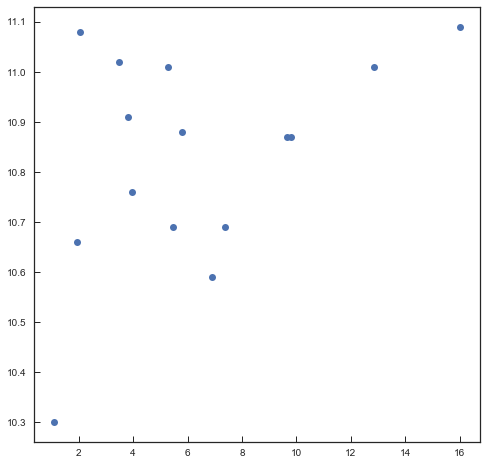

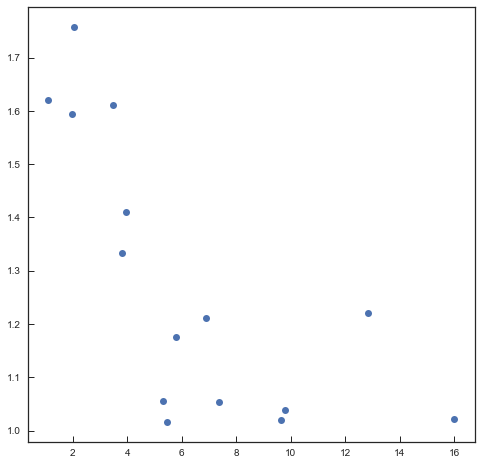

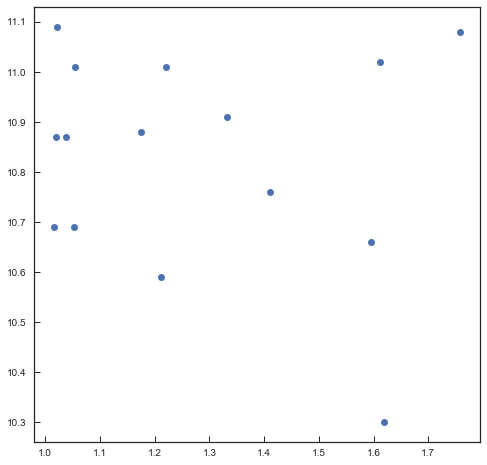

In [12]:
%matplotlib inline
lmass = [10.88,11.09,10.87,10.69,10.91,10.66,10.59,11.01,10.76,11.08,10.3,10.69,11.02,10.87,11.01]
rshift=[1.175,1.022,1.019,1.053,1.333,1.595,1.212,1.221,1.41,1.758,1.62,1.016,1.611,1.038,1.055]

plt.figure(figsize=[8,8])
plt.plot(SN,lmass,'o')

plt.figure(figsize=[8,8])
plt.plot(SN,rshift,'o')

plt.figure(figsize=[8,8])
plt.plot(rshift,lmass,'o')

In [27]:
Color = []
Color_sig = []
M_Color = []
M_Color_sig = []
D_Color_sig = []
beta = (2.5/np.log(10))**2
for i in fDB2.index:
    Color.append(Magnitude(fDB2['flam_F098'][i]/fDB2['flam_F850'][i]))
    Color_sig.append(np.sqrt(beta*((fDB2['flam_F098_err'][i]/fDB2['flam_F098'][i])**2 + 
                                   (fDB2['flam_F850_err'][i]/fDB2['flam_F850'][i])**2)))
    M_Color.append(Magnitude(fDB2['M_F098'][i]/fDB2['M_F850'][i]))
    M_Color_sig.append(np.sqrt(beta*((fDB2['M_F098_err'][i]/fDB2['M_F098'][i])**2 + 
                                     (fDB2['M_F850_err'][i]/fDB2['M_F850'][i])**2)))
    D_Color_sig.append(np.sqrt(beta*((fDB2['M_F098_err'][i]/fDB2['M_F098'][i])**2 + 
                                     (fDB2['M_F850_err'][i]/fDB2['M_F850'][i])**2)+
                               (fDB2['flam_F098_err'][i]/fDB2['flam_F098'][i])**2 + 
                               (fDB2['flam_F850_err'][i]/fDB2['flam_F850'][i])**2))
D_Color = np.array(Color) - np.array(M_Color)

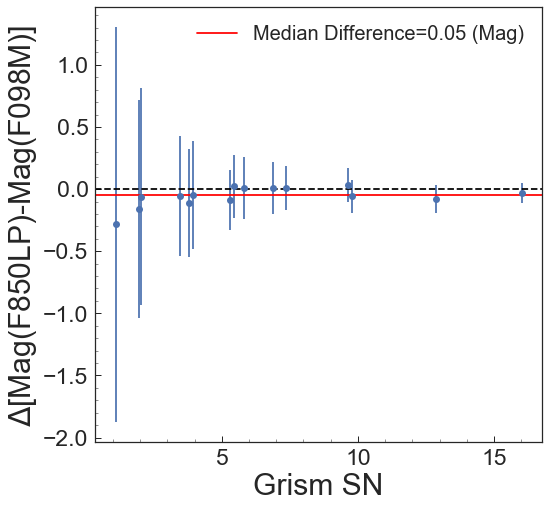

In [36]:
%matplotlib inline

plt.figure(figsize=[8,8])
plt.errorbar(fDB2['SN'],D_Color,D_Color_sig,fmt='o')
plt.axhline(-.05,color='r',label = 'Median Difference=0.05 (Mag)')
plt.axhline(.0,color='k',linestyle='--')
plt.ylabel('$\Delta$[Mag(F850LP)-Mag(F098M)] ',size=30)
plt.xlabel('Grism SN',size=30)
plt.tick_params(axis='both', which='major', labelsize=23)
plt.minorticks_on()
plt.legend(fontsize=20)
# plt.show()
plt.savefig('../plots/dcolor1.pdf',bbox_inches = 'tight')
# plt.close()

-0.0537166843432


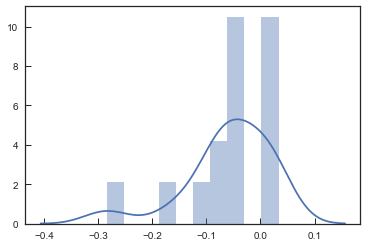

In [33]:
sea.distplot(D_Color,bins=10)
print np.median(D_Color)

(0.053716684343218531, 0.031289895697022486, 0.061215420640801349)

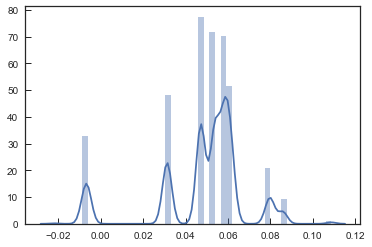

In [70]:
Bootstrap_errors(fDB2['flam_F098'].values,fDB2['flam_F850'].values,fDB2['M_F098'].values,fDB2['M_F850'].values,
                its=1000)